Introdução: Usaremos o mínimo possível de bibliotecas externas para realizar o tratamento de cores em imagens. Usaremos a biblioteca cv2 para transformar a imagem jpeg em arquivo ppm. Além disso, usaremos o numpy para executar calculos na matriz. Para imprimir as imagens, usaremos o matplotlib.

In [ ]:
!pip install opencv-python==4.8.0 numpy==1.26.4 matplotlib==3.8.4

import cv2
import numpy as np
import matplotlib

print('OpenCV versão:', cv2.__version__)
print('NumPy versão:', np.__version__)
print('Matplotlib versão:', matplotlib.__version__)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Primeira parte: incluir a imagem ao programa. Para isso lemos a imagem com a função imread da biblioteca cv2.


In [24]:
# Passo 1: Ler a imagem JPEG e converter para PPM

img = cv2.imread('landscape.jpeg')
cv2.imwrite('entrada.ppm', img)
print('Imagem JPEG convertida para PPM com sucesso!')

Imagem JPEG convertida para PPM com sucesso!


Segunda Parte: Criação da função para transformar a imagem em escala de cinza. Primeiramente vamos transformar o arquivo jpeg em PPM. Este arquivo trata cada pixel como uma linha de texto, com os valores RGB separados por espaços. A função de leitura deve ser capaz de interpretar esse formato e armazenar os dados em uma matriz.


In [25]:

    
def ler_ppm(caminho):
	with open(caminho, 'r', encoding='utf-8') as f:
		# Ignora o tipo do arquivo (P3)
		tipo = f.readline().strip()
		# Lê largura e altura
		while True:
			linha = f.readline()
			if linha.startswith('#'):
				continue
			else:
				largura, altura = map(int, linha.strip().split())
				break
		# Lê valor máximo
		max_valor = int(f.readline().strip())
		# Lê pixels
		pixels = []
		for linha in f:
			if linha.startswith('#') or linha.strip() == '':
				continue
			pixels.extend(map(int, linha.strip().split()))
		matriz = [pixels[i:i+3] for i in range(0, len(pixels), 3)]
	return largura, altura, max_valor, matriz

def salvar_ppm(caminho, largura, altura, max_valor, matriz):
	with open(caminho, 'w') as f:
		f.write('P3\n')
		f.write(f'{largura} {altura}\n')
		f.write(f'{max_valor}\n')
		for pixel in matriz:
			r, g, b = pixel
			f.write(f'{r} {g} {b}\n')

def escala_de_cinza(matriz):
	# Aplica a média ponderada para cada pixel RGB
	matriz_cinza = []
	for pixel in matriz:
		r, g, b = pixel
		# Fórmula padrão: 0.299*R + 0.587*G + 0.114*B
		cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
		matriz_cinza.append([cinza, cinza, cinza])
	return matriz_cinza

# Converte JPEG para PPM (P3) manualmente
altura, largura, canais = img.shape
max_valor = 255

with open('entrada.ppm', 'w') as f:
	f.write('P3\n')
	f.write(f'{largura} {altura}\n')
	f.write(f'{max_valor}\n')
	for y in range(altura):
		for x in range(largura):
			r, g, b = img[y, x]
			f.write(f'{r} {g} {b}\n')

largura, altura, max_valor, matriz = ler_ppm('entrada.ppm')

Terceira Parte: Após isto, podemos transformar as cores da imagem em tons de cinza, utilizando a média ponderada dos valores RGB. Para isto, é usada a função `escala_de_cinza`, que aplica a fórmula de conversão para cada pixel da imagem.


Quarta parte: Criação de função para transformar a imagem em preto e branco. Para isto, é usada a função `preto_e_branco`, que aplica a fórmula de conversão para cada pixel da imagem. Primeiramente é usado o mesmo método para conversão de cor para escalas de cinza e caso o valor de cinza seja maior que 128 (valor médio padrão na metade da escala que vai de 0 a 255), o pixel é definido como branco, caso contrário, é definido como preto. Podemos variar este valor passando o parâmetro junto com a matriz de entrada da função


In [26]:

def preto_e_branco(matriz, limiar=128):
    matriz_pb = []
    for pixel in matriz:
        r, g, b = pixel
        # Calcula o valor de cinza
        cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
        # Aplica limiar para preto e branco
        valor = 255 if cinza >= limiar else 0
        matriz_pb.append([valor, valor, valor])
    return matriz_pb



Parte final: chamada das funções e exibição dos resultados

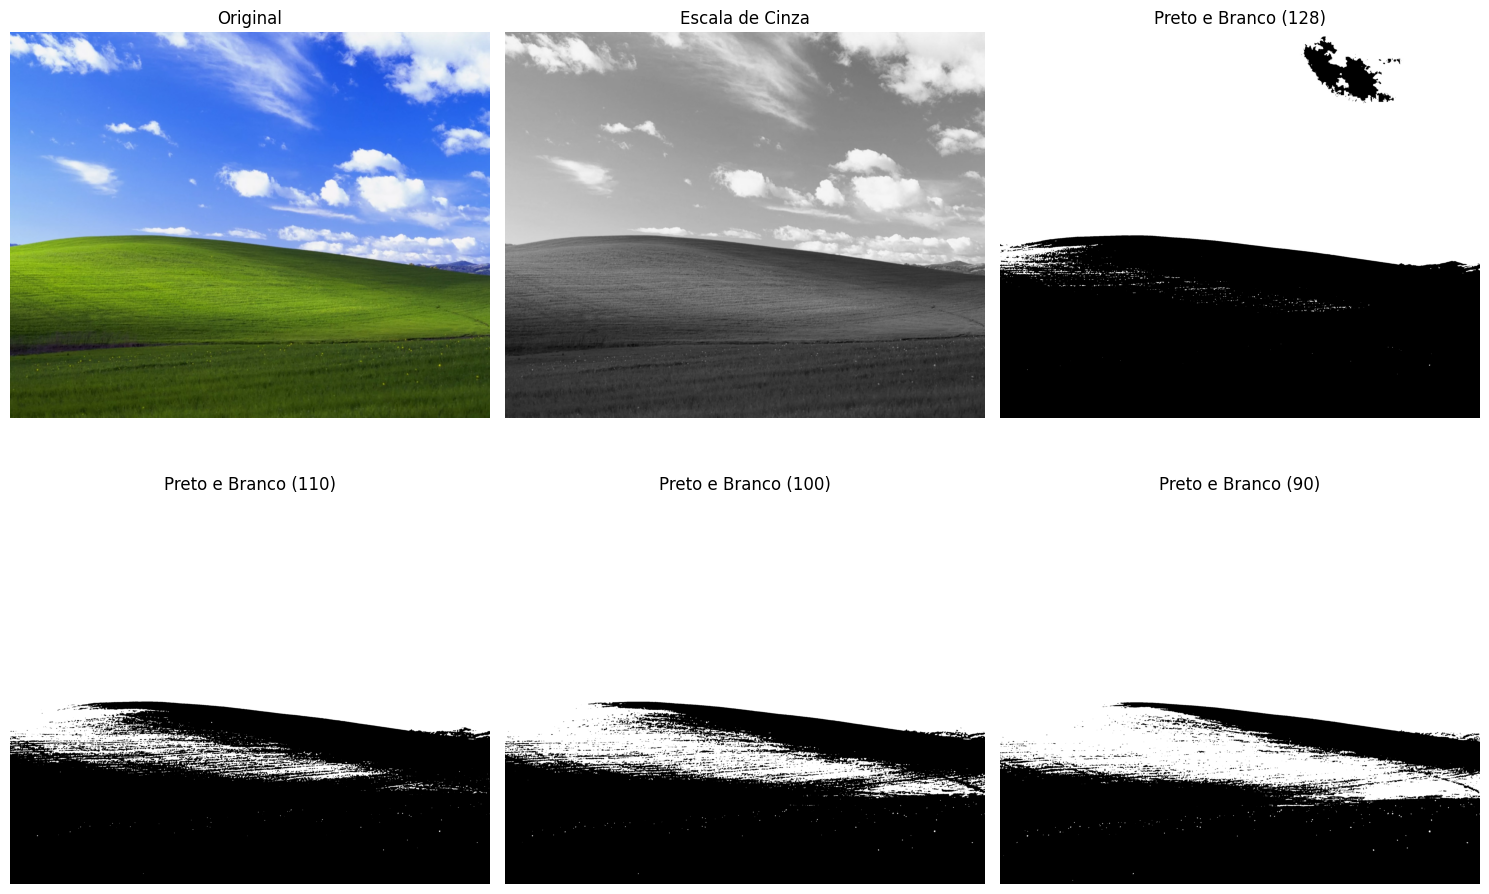

In [29]:
#Passo 2:

# Passo 3: Converter para escala de cinza e salvar resultado
matriz_cinza = escala_de_cinza(matriz)
salvar_ppm('saida_cinza.ppm', largura, altura, max_valor, matriz_cinza)
#transformando ppm em jpeg após conversão
img_cinza = cv2.imread('saida_cinza.ppm')
cv2.imwrite('saida_cinza.jpg', img_cinza)

# Passo 4: Converter para preto e branco e salvar resultado
matriz_pb = preto_e_branco(matriz)
salvar_ppm('saida_pb.ppm', largura, altura, max_valor, matriz_pb)

#transformando ppm em jpeg após conversão
img_pb = cv2.imread('saida_pb.ppm')
cv2.imwrite('saida_pb.jpg', img_pb)

# Modificando o valor padrão em preto_e_branco
matriz_pb110 = preto_e_branco(matriz, 110)
salvar_ppm('saida_pb110.ppm', largura, altura, max_valor, matriz_pb110)
img_pb = cv2.imread('saida_pb110.ppm')
cv2.imwrite('saida_pb110.jpg', img_pb)

matriz_pb100 = preto_e_branco(matriz, 100)
salvar_ppm('saida_pb100.ppm', largura, altura, max_valor, matriz_pb100)
img_pb = cv2.imread('saida_pb100.ppm')
cv2.imwrite('saida_pb100.jpg', img_pb)

matriz_pb90 = preto_e_branco(matriz, 90)
salvar_ppm('saida_pb90.ppm', largura, altura, max_valor, matriz_pb90)
img_pb = cv2.imread('saida_pb90.ppm')
cv2.imwrite('saida_pb90.jpg', img_pb)

img_original = cv2.imread('landscape.jpeg')
img_cinza = cv2.imread('saida_cinza.jpg')
img_pb = cv2.imread('saida_pb.jpg')

# Converter de BGR para RGB para exibição correta
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_cinza = cv2.cvtColor(img_cinza, cv2.COLOR_BGR2RGB)
img_pb = cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB)

# Gerar e salvar imagens preto e branco com diferentes limiares
salvar_ppm('saida_pb110.ppm', largura, altura, max_valor, matriz_pb110)
salvar_ppm('saida_pb100.ppm', largura, altura, max_valor, matriz_pb100)
salvar_ppm('saida_pb90.ppm', largura, altura, max_valor, matriz_pb90)

img_pb110 = cv2.imread('saida_pb110.ppm')
img_pb100 = cv2.imread('saida_pb100.ppm')
img_pb90 = cv2.imread('saida_pb90.ppm')

img_pb110 = cv2.cvtColor(img_pb110, cv2.COLOR_BGR2RGB)
img_pb100 = cv2.cvtColor(img_pb100, cv2.COLOR_BGR2RGB)
img_pb90 = cv2.cvtColor(img_pb90, cv2.COLOR_BGR2RGB)


# Exibir as imagens adicionais abaixo das principais
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(img_original)
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')
axs[0, 1].imshow(img_cinza)
axs[0, 1].set_title('Escala de Cinza')
axs[0, 1].axis('off')
axs[0, 2].imshow(img_pb)
axs[0, 2].set_title('Preto e Branco (128)')
axs[0, 2].axis('off')

axs[1, 0].imshow(img_pb110)
axs[1, 0].set_title('Preto e Branco (110)')
axs[1, 0].axis('off')
axs[1, 1].imshow(img_pb100)
axs[1, 1].set_title('Preto e Branco (100)')
axs[1, 1].axis('off')
axs[1, 2].imshow(img_pb90)
axs[1, 2].set_title('Preto e Branco (90)')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()